# Directivity of a distribution of baffled pistons with arbitrary phase

N Pistons with different sizes, are randomnly placed on the plane. The pistons vibrate with arbitrary phase. The relative phase bewteen the pistons 1 and 2 is denoted $\Phi_{12}$ and the relative distance $d_{12}$.

## Single baffled piston
A piston with radius $a$ is placed on a plane, as depicted in **Figure 1.**

<center> <img src="img/piston.png" width=600 class="center"/> </center> 
<!-- <iframe src="img/piston.pdf" width="50%" height="520px"> -->

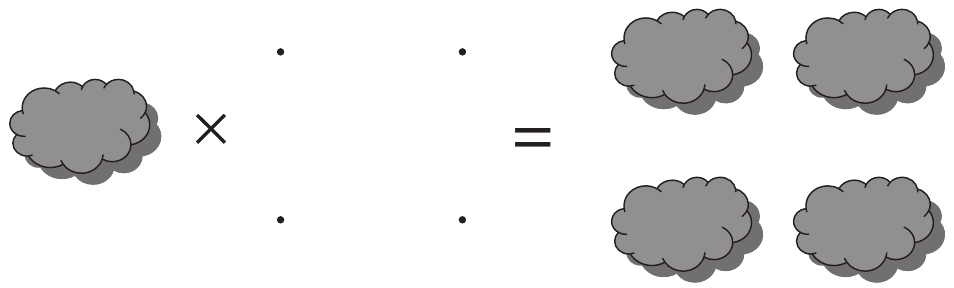

In [1]:
from mf.settings import clean_env
import matplotlib.pyplot as plt
from mf.plots import PlotSettings, SetupPresentation, SetupPaper
import numpy as np
import matplotlib.colors as mcolors
my_colors = list(mcolors.TABLEAU_COLORS)
import scipy.special as sp
SetupPaper(14)

#%% Baffled
def dir_piston(theta, ka):
    return np.abs(2*sp.jv(1, ka*np.sin(theta))/(ka*np.sin(theta)))

def dir_dipole(theta, phi, ka, kd, phase):
    alpha = np.sin(theta)*np.cos(phi)
    return np.abs(dir_piston(theta, ka)*(1+np.exp(1j*(kd*alpha + phase))))/2
    
def tripole_long(theta, phi, ka, kd):
    alpha = np.sin(theta)*np.cos(phi)
    return np.abs(dir_piston(theta, ka)*(-1 + np.exp(1j*kd*alpha) - np.exp(1j*2*kd*alpha)))/3

def tripole_L(theta, phi, ka, kd):
    alpha = np.sin(theta)*np.cos(phi)
    beta =  np.sin(theta)*np.sin(phi)
    return np.abs(dir_piston(theta, ka)*(1 - np.exp(1j*kd*alpha) - np.exp(1j*kd*beta)))/3

def quadrupole_line(theta, phi,ka, kd):
    alpha = np.sin(theta)*np.cos(phi)   
    return np.abs(dir_piston(theta, ka)*(-1 + np.exp(1j*kd*alpha) - np.exp(1j*2*kd*alpha) + np.exp(1j*3*kd*alpha)))/4

def quadrupole_square(theta, phi, ka, kd):
    alpha = np.sin(theta)*np.cos(phi)
    beta =  np.sin(theta)*np.sin(phi)
    return np.abs(dir_piston(theta, ka)*( np.exp(-1j*kd/2*(alpha + beta)) 
                                         -np.exp(-1j*kd/2*(alpha - beta)) 
                                         +np.exp( 1j*kd/2*(alpha + beta)) 
                                         -np.exp( 1j*kd/2*(alpha - beta))))/4

def dipole_2(theta,phi, k, a1, a2, d, sign):
    ka1 = k*a1
    ka2 = k*a2
    kd  = k*d
    alpha = np.sin(theta)*np.cos(phi)
    
    return np.abs(dir_piston(theta, ka1) + dir_piston(theta, ka2)*np.exp(1j*(kd*alpha+phasee)))/2

def Directivity(ii, theta, phi, ka, kd):
    return {
        'Piston':   dir_piston(theta, ka),
        'Dipole++': dir_dipole(theta, phi, ka, kd, 0),
        'Dipole+-': dir_dipole(theta, phi, ka, kd, np.pi),
        'Tripole l': tripole_long(theta, phi, ka, kd),
        'Tripole': tripole_L(theta, phi, ka, kd),
        'Quadrupole l': quadrupole_line(theta, phi,ka, kd),
        'Quadrupole L': quadrupole_square(theta, phi, ka, kd),
        }

def Plot(ii):
    txt = ['Piston', 'Dipole++', 'Dipole+-', 'Tripole l', 'Tripole L', 'Quadrupole l', 'Quadrupole L']
    nka = np.array([0.1, 1, 10], dtype=object)
    alpha_type = [0.4, 0.5, 1]
    lw_type = [4, 2, .5 ]
    my_colors[2] = '#006A00'
    idx = 0
    a1  = 1

    theta = np.linspace(-np.pi/2, np.pi/2, 1000)
    phi = 0
    
    a2 = a1*np.sqrt(2)
    fig, ax1 = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(5,4))
    
    for ka in nka:
        kd = 2*ka
        k = ka/a1
        d0 = (a1+a2)
        dir_array = Directivity(ii, theta, phi, ka, kd)
        r = dir_array[ii]
        ax1.plot(theta + np.pi/2, r, lw=lw_type[idx], alpha = alpha_type[idx], color=my_colors[idx],label = r'$ka=$ %g'%(ka))
        idx +=1

    r_max= 1.02
    ax1.set_rmax(r_max)

    ax1.set_thetamin(0)
    ax1.set_thetamax(180)   
    ax1.tick_params(axis='y', which='major')#, labelsize=12)
    plt.grid(axis='x', ls=':',  lw=0.5,  color='#DCDCDC')
    plt.grid(axis='y', ls=':',  lw=0.5, color='#DCDCDC')
    ax1.set_rticks([0, 0.3,0.7,1]) 
    ax1.set_xticks(np.linspace(0,  np.pi, 6, endpoint=False))
    ax1.grid(True)
    plt.legend(loc='upper center', fontsize=12, ncol=3, bbox_to_anchor=[0.5,1.05]);


\begin{equation}\large
D_p(\theta)  = \frac{2J_1(ka\sin\theta)}{ka\sin\theta}
\end{equation}

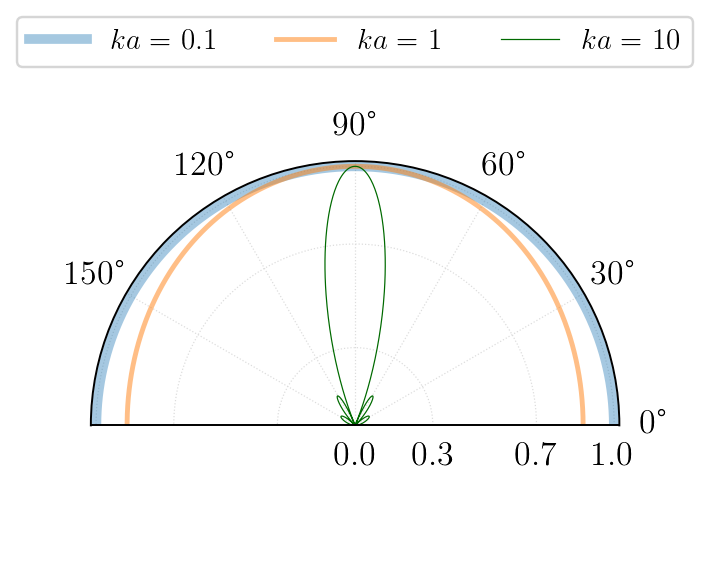

In [2]:
Plot('Piston')

\begin{equation}\large
D(\theta,\phi) = D_p(\theta)\left[1 + e^{i(kd\sin\theta\cos\phi+\Phi_{12})}\right]
\end{equation}

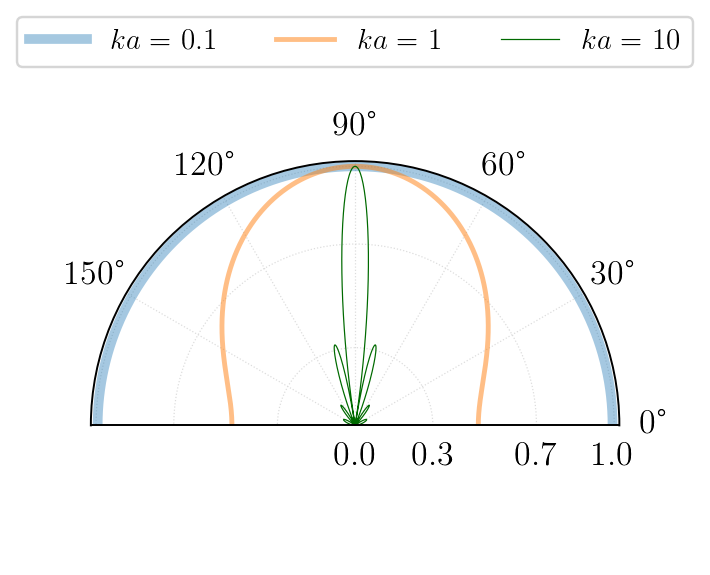

In [3]:
Plot('Dipole++')

In [4]:
M,N = 300, 50
theta, phi = np.linspace(-np.pi, np.pi, M), np.linspace(0.01, 2*np.pi, N)
# r = np.linspace(0,1, 60)
THETA, PHI = np.meshgrid(theta, phi)
ka=10
kd=2*ka

def Directivity(ii, THETA, PHI, ka, kd, sign):
    return {
        '1': dir_piston(THETA, ka),
        '2': dir_dipole(THETA, PHI, ka, kd, sign),
        '3': dir_dipole(THETA, PHI, ka, kd, sign),
        '4': tripole_long(THETA, PHI, ka, kd),
        '5': tripole_L(THETA, PHI, ka, kd),
        '6': quadrupole_line(THETA, PHI,ka, kd),
        '7': quadrupole_square(THETA, PHI, ka, kd),
        }


# D = [D1,D2,D3,D4,D5,D6,D7]
txt = ['Piston', 'Dipole++', 'Dipole+-', 'Tripole l', 'Tripole L', 'Quadrupole l', 'Quadrupole L']
fig = plt.figure()

phi = phi[0]   
# def CreatePlots():
ii=0
if ii==2:
    sign='plus'
else:
    sign='minus'

DIR3D = Directivity(ii, THETA, PHI, ka, kd, sign)
dir2D = Directivity(ii, theta, phi, ka, kd, sign)
r = dir2D[str(ii+1)]
R = DIR3D[str(ii+1)]

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)

x = r*np.sin(theta)* np.cos(phi)
y = r*np.sin(theta)* np.sin(phi)
z = r*np.cos(theta)

ax = fig.add_subplot(2,4,ii+1, projection='3d')
ax.plot(x, y*-2, zs=np.abs(z), zdir='z', lw=1, alpha=0.9)
ax.plot_surface(X, Y, R, rstride=1, cstride=1, cmap='viridis',linewidth=1, antialiased=True)#, alpha=0.3)

# Get rid of colored axes planes
ax.set_title(txt[ii])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

# Bonus: To get rid of the grid as well:
ax.grid(axis='x', ls=':',  lw=0.5,  color='#DCDCDC')
ax.grid(axis='y', ls=':',  lw=0.5, color='#DCDCDC')
ax.grid(axis='z', ls=':',  lw=0.5, color='#DCDCDC')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Create projection
cx = np.ones_like(X) * ax.get_xlim3d()[0]
cy = np.ones_like(X) * ax.get_ylim3d()[1]
cz = np.ones_like(R) * ax.get_zlim3d()[0]


# ax.plot(X, cy, R,  lw=0, alpha=0.2)
# ax.plot(cx, Y, R,  lw=0, alpha=0.2)


# Double Bonus: Sex axis equal 3D (aspect ratio is 1:1:1 in data space)
ax.set_box_aspect((np.ptp(X), np.ptp(X), np.ptp(R)))  
# ax.set_box_aspectx((1, 1, 1))  
ax.view_init(elev=20., azim=105)
plt.show()  


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

<Figure size 1050x700 with 0 Axes>